Работа с данными  

предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?


https://drive.google.com/file/d/18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K/view?usp=sharing


сделать можно на питоне в юпитер или экселе или в гугл шите, даже можете в sql сделать, как удобнее.

обратно нужно дать файл с формулами или кодом и описание того, как получился результат поэтапно.

https://drive.google.com/file/d/1O5va99GRly4vVPgW2PsyjrdJ398VP5cq/view?usp=sharing - мой диск

#### Подготовка

In [1]:
!gdown 1O5va99GRly4vVPgW2PsyjrdJ398VP5cq

Downloading...
From: https://drive.google.com/uc?id=1O5va99GRly4vVPgW2PsyjrdJ398VP5cq
To: /content/analyst_test_transactions_db.csv
100% 3.07M/3.07M [00:00<00:00, 104MB/s]


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

#### EDA

In [4]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76857 entries, 0 to 76856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           76857 non-null  int64  
 1   order_id          76857 non-null  float64
 2   reg_date          76857 non-null  object 
 3   transaction_date  76857 non-null  object 
 4   revenue           76857 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [6]:
df['reg_date'] = pd.to_datetime(df['reg_date'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

user_id             0
order_id            0
reg_date            0
transaction_date    0
revenue             0
dtype: int64

In [9]:
df.describe()

,user_id,order_id,revenue
count,76857.000000,76857.000000,76857.000000
mean,50112.561120,99950.627984,1000.587559
std,20051.576685,53283.741305,248.729287
min,-37599.000000,-138325.000000,-146.000000
25%,36575.000000,62909.000000,832.000000
50%,50145.000000,100145.000000,1001.000000
75%,63716.000000,136997.000000,1168.000000
max,138987.000000,305790.000000,2069.000000


In [10]:
df['user_id'].nunique()

48214

In [11]:
df['reg_date'].count()

76857

#### Анализ датасета

In [12]:
df['transaction_date'].agg({'min','max'})

max   2015-11-20
min   2015-01-01
Name: transaction_date, dtype: datetime64[ns]

In [13]:
df['trans_month'] = df['transaction_date'].dt.month

In [14]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue,trans_month
0,57562,94545.0,2013-12-22,2015-07-16,1088,7
1,40047,81824.0,2013-11-24,2015-01-19,1027,1
2,48153,144851.0,2015-07-03,2015-10-29,601,10
3,54591,116111.0,2013-07-12,2015-04-30,881,4
4,39789,134943.0,2013-05-25,2015-07-21,984,7


In [15]:
len(df)

76857

In [16]:
df.groupby('trans_month')['revenue'].agg({'mean','sum'}).round(2)

,sum,mean
trans_month,,
1,4084771,1006.60
2,4940204,1001.66
3,5870379,1007.96
4,6123617,1003.54
5,6329338,998.48
6,6819496,998.61
7,7535986,1002.13
8,8561012,995.70
9,8485216,1002.03


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'order_id'}>],
       [<AxesSubplot:title={'center':'reg_date'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'trans_month'}>]], dtype=object)

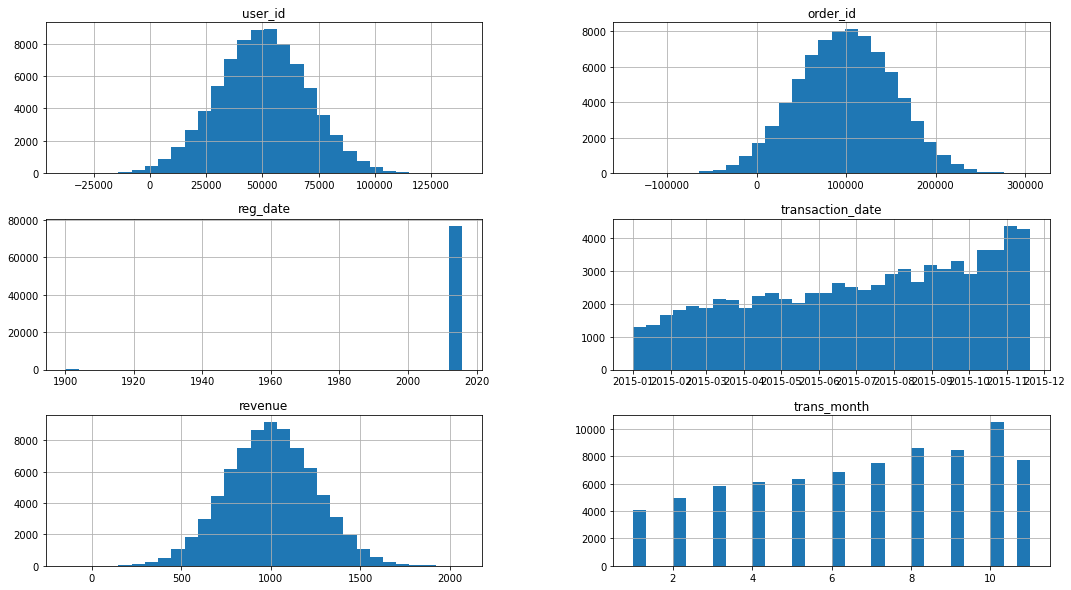

In [17]:
df.hist(figsize=(18,10),bins=30)

<AxesSubplot:title={'center':'Сумма выручки по месяцам'}, xlabel='trans_month'>

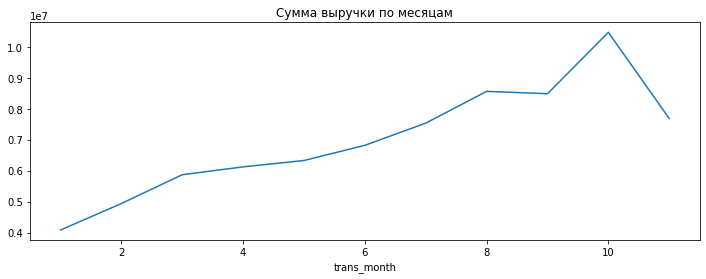

In [18]:
df.groupby('trans_month')['revenue'].sum().round(2).plot(kind='line',
                                                         title='Сумма выручки по месяцам',
                                                         figsize=(12,4))

<AxesSubplot:title={'center':'Средняя выручка по месяцам'}, xlabel='trans_month'>

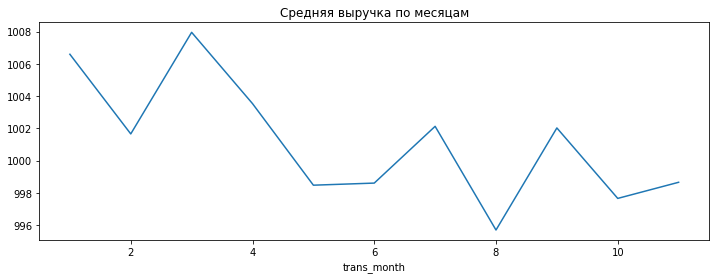

In [19]:
df.groupby('trans_month')['revenue'].mean().round(2).plot(kind='line',
                                                          title='Средняя выручка по месяцам' ,
                                                          figsize=(12,4))

<AxesSubplot:title={'center':'Количество пользователей по месяцам'}, xlabel='trans_month'>

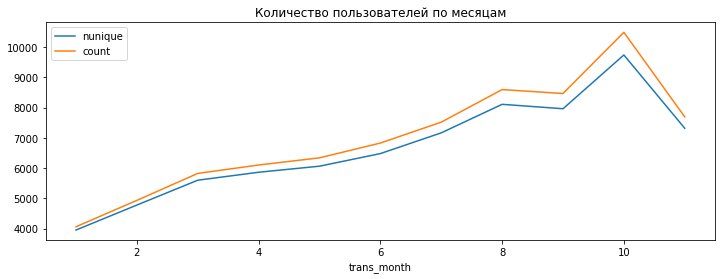

In [20]:
df.groupby('trans_month')['user_id'].agg({'count','nunique'}).plot(title='Количество пользователей по месяцам',
                                                                   figsize=(12,4))

In [21]:
df['reg_month'] = df['reg_date'].dt.to_period('M')

In [22]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue,trans_month,reg_month
0,57562,94545.0,2013-12-22,2015-07-16,1088,7,2013-12
1,40047,81824.0,2013-11-24,2015-01-19,1027,1,2013-11
2,48153,144851.0,2015-07-03,2015-10-29,601,10,2015-07
3,54591,116111.0,2013-07-12,2015-04-30,881,4,2013-07
4,39789,134943.0,2013-05-25,2015-07-21,984,7,2013-05


In [23]:
df['reg_month'].min()

Period('1900-01', 'M')

<AxesSubplot:xlabel='reg_month'>

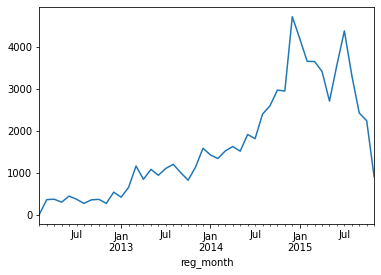

In [24]:
df[df['reg_month']>'1900-02'].groupby('reg_month')['user_id'].count().plot()

<AxesSubplot:xlabel='reg_month'>

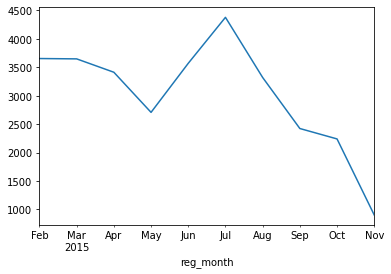

In [25]:
df[df['reg_month']>'2015-01'].groupby('reg_month')['user_id'].count().plot()

#### Retention

In [26]:
df['trans_month'] = df['transaction_date'].to_numpy().astype('datetime64[M]')

In [27]:
df['reg_month'] = df['reg_date'].to_numpy().astype('datetime64[M]')

In [28]:
df

,user_id,order_id,reg_date,transaction_date,revenue,trans_month,reg_month
0,57562,94545.0,2013-12-22,2015-07-16,1088,2015-07-01,2013-12-01
1,40047,81824.0,2013-11-24,2015-01-19,1027,2015-01-01,2013-11-01
2,48153,144851.0,2015-07-03,2015-10-29,601,2015-10-01,2015-07-01
3,54591,116111.0,2013-07-12,2015-04-30,881,2015-04-01,2013-07-01
4,39789,134943.0,2013-05-25,2015-07-21,984,2015-07-01,2013-05-01
...,...,...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095,2015-03-01,2015-01-01
76853,31360,145146.0,2015-01-04,2015-08-09,547,2015-08-01,2015-01-01
76854,56195,8929.0,2012-09-18,2015-11-12,850,2015-11-01,2012-09-01
76855,46362,78673.0,2015-02-20,2015-07-21,356,2015-07-01,2015-02-01


In [29]:
min_date = df['trans_month'].min()
max_date = df['trans_month'].max()

In [30]:
calendar = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS')).rename({0:'month'}, axis=1)

In [31]:
calendar

,month
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [32]:
df['key'] = 1
calendar['key'] = 1

In [33]:
t = df.merge(calendar, on='key')

In [34]:
t.columns

Index(['user_id', 'order_id', 'reg_date', 'transaction_date', 'revenue',
       'trans_month', 'reg_month', 'key', 'month'],
      dtype='object')

In [35]:
t = t[t['reg_month']>= t.trans_month][['user_id', 'reg_month','trans_month', 'revenue', 'month']]

In [36]:
t.head()

,user_id,reg_month,trans_month,revenue,month
176,53312,2015-06-01,2015-06-01,580,2015-01-01
177,53312,2015-06-01,2015-06-01,580,2015-02-01
178,53312,2015-06-01,2015-06-01,580,2015-03-01
179,53312,2015-06-01,2015-06-01,580,2015-04-01
180,53312,2015-06-01,2015-06-01,580,2015-05-01


In [37]:
trans_month = df.groupby(['user_id','trans_month'])['revenue'].sum().reset_index()

In [38]:
trans_month.columns = ['user_id','month','revenue']

In [39]:
report = t.merge(trans_month,on=['user_id','month'],how='left')

In [40]:
report

,user_id,reg_month,trans_month,revenue_x,month,revenue_y
0,53312,2015-06-01,2015-06-01,580,2015-01-01,NaN
1,53312,2015-06-01,2015-06-01,580,2015-02-01,NaN
2,53312,2015-06-01,2015-06-01,580,2015-03-01,NaN
3,53312,2015-06-01,2015-06-01,580,2015-04-01,NaN
4,53312,2015-06-01,2015-06-01,580,2015-05-01,NaN
...,...,...,...,...,...,...
104583,82072,2015-08-01,2015-08-01,881,2015-07-01,NaN
104584,82072,2015-08-01,2015-08-01,881,2015-08-01,881.0
104585,82072,2015-08-01,2015-08-01,881,2015-09-01,NaN
104586,82072,2015-08-01,2015-08-01,881,2015-10-01,NaN


In [41]:
report['active'] = (report['revenue_y'] > 0)*1

In [42]:
report[report['user_id']==53312]

,user_id,reg_month,trans_month,revenue_x,month,revenue_y,active
0,53312,2015-06-01,2015-06-01,580,2015-01-01,NaN,0
1,53312,2015-06-01,2015-06-01,580,2015-02-01,NaN,0
2,53312,2015-06-01,2015-06-01,580,2015-03-01,NaN,0
3,53312,2015-06-01,2015-06-01,580,2015-04-01,NaN,0
4,53312,2015-06-01,2015-06-01,580,2015-05-01,NaN,0
5,53312,2015-06-01,2015-06-01,580,2015-06-01,580.0,1
6,53312,2015-06-01,2015-06-01,580,2015-07-01,NaN,0
7,53312,2015-06-01,2015-06-01,580,2015-08-01,1149.0,1
8,53312,2015-06-01,2015-06-01,580,2015-09-01,NaN,0
9,53312,2015-06-01,2015-06-01,580,2015-10-01,1418.0,1


In [43]:
retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')

In [44]:
retention.round(2)

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
2015-01-01,1.00,0.07,0.08,0.09,0.11,0.09,0.08,0.09,0.12,0.14,0.10
2015-02-01,0.07,1.00,0.08,0.09,0.07,0.11,0.07,0.11,0.14,0.14,0.09
2015-03-01,0.04,0.08,1.00,0.07,0.08,0.10,0.09,0.11,0.12,0.13,0.12
2015-04-01,0.06,0.06,0.06,1.00,0.07,0.08,0.09,0.12,0.10,0.14,0.11
2015-05-01,0.05,0.07,0.09,0.08,1.00,0.09,0.09,0.10,0.09,0.12,0.12
2015-06-01,0.06,0.07,0.06,0.07,0.08,1.00,0.10,0.10,0.13,0.14,0.10
2015-07-01,0.05,0.05,0.08,0.08,0.08,0.08,1.00,0.10,0.12,0.14,0.10
2015-08-01,0.05,0.06,0.09,0.09,0.08,0.08,0.09,1.00,0.11,0.13,0.10
2015-09-01,0.06,0.06,0.08,0.08,0.09,0.09,0.08,0.12,1.00,0.14,0.09
